##### 壓縮檔案 zipfile
Python 的標準函式「zipfile」提供可以將檔案或資料夾壓縮為 zip 壓縮檔、或將壓縮檔解壓縮的方法，這篇教學將會介紹 zipfile 的使用方法。

##### import zipfile 
要使用 zipfile 必須先 import zipfile 模組，或使用 from 的方式，單獨 import 特定的類型。

In [ ]:
import zipfile
from zipfile import ZipFile

##### 壓縮檔案 
ZipFile() 是 zipfile 函式庫裡最常使用的方法，將 ZipFile() 的 mode 參數設定為「w」，就能壓縮檔案或資料夾，下方的程式碼執行後，\
會將兩張圖片壓縮為一個名叫 test.zip 的壓縮檔，當中使用 with...as 的語法，壓縮完成後就會關閉壓縮的流程。

ZipFile() 方法裡還有 compression 參數，可以設定壓縮成 zip 的壓縮方法，通常不需要進行設定，如果需要設定可以參考：[ZipFile 對象](https://docs.python.org/zh-tw/3.8/library/zipfile.html#zipfile-objects)
* 注意，要壓縮的檔案路徑採用和 Python 執行檔的相對路徑，範例中的檔案和 Python 執行檔放在同一個資料夾中。
* 雖然 zipfile 函式庫有提供 setpassword 的方法，但根據官方說明，該方法只能取得密碼，無法設定密碼。

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用

with zipfile.ZipFile('test.zip', mode='w') as zf:
    zf.write('oxxo1.jpg')
    zf.write('oxxo2.jpg')

如果不使用 with...as 語法，也可使用下方的程式碼，壓縮完成後再透過 close() 方法關閉壓縮流程。

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用

import zipfile

zf = zipfile.ZipFile('test.zip', mode='w')
zf.write('mona.jpg')
zf.write('mona2.jpg')
zf.write('../bg4.jpg')
zf.close()

##### 在壓縮檔內添加檔案 
如果將 FileZip() 方法的模式設定為「a」，就可以在現成的壓縮檔中添加檔案，下方的程式碼執行後，會在原本的 test.zip 裡，\
添加一張名為 orange.jpg 的圖片。

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用

import zipfile

with zipfile.ZipFile('test.zip', mode='a') as zf:
    zf.write('orange.jpg')

##### 讀取壓縮檔內的檔案 
如果將 FileZip() 方法的模式設定為「r」，就可以單純讀取壓縮檔，下方列出讀取壓縮檔後的操作方法：

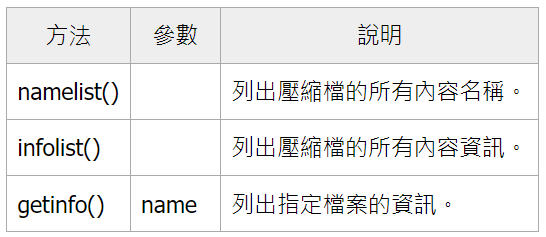

執行 getinfo() 之後，就可以按照下表，取出該檔案常用的屬性：

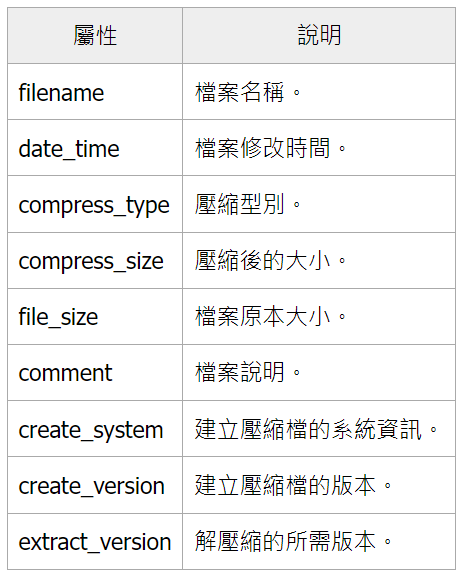

下方的程式碼執行後，會從 test.zip 壓縮檔中，列出內容的檔案清單，接著會印出其中一個檔案的檔名、大小與壓縮後的大小。

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用

import zipfile

with zipfile.ZipFile('test.zip', mode='r') as zf:
    print(zf.namelist())             # 印出清單
    img1 = zf.getinfo('oxxo1.jpg')   # 取得檔案資訊
    print(img1.filename)             # 印出名稱
    print(img1.file_size)            # 印出原始大小
    print(img1.compress_size)        # 印出壓縮後的大小

##### 解壓縮檔案 ( 支援有密碼的壓縮檔 ) 
讀取壓縮檔後，就可以使用 extract() 方法進行解壓縮的動作，使用方法如下：

In [ ]:
zf.extract(name, path, pwd)
# name 要解壓縮的檔案名稱
# path 解壓縮後要放的位置
# pwd 解壓縮密碼

下方的程式碼執行後，會將一個具有 123 密碼的壓縮檔，解壓縮後放到 zipfolder 的資料夾中。
* 解壓縮路徑使用 r 開頭，可以避免一些斜線字元被轉義。
* 密碼後方要加上 encode('utf-8') 才會是 utf-8 文字字元。

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 針對 Colab 改變路徑，本機環境可不用

import zipfile

with zipfile.ZipFile('test.zip', mode='r') as zf:
    nameList = zf.namelist()
    for name in nameList:
        zf.extract(name, r'zipfolder', pwd='123'.encode('utf-8'))